<a href="https://colab.research.google.com/github/hamrioui2019/Machine-learning-/blob/master/ml_tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP classification naïve bayésienne

## Application 

On reprend les données du TD sur les arbres de décisions, on va maintenant utiliser la classification naïve bayésienne sur ces données.

| Day |Temperature | Humidity | Wind | Weather | Play  |
|:---:|  :---:    |  :---:   |:---: | :---:   | :---: |
|1 | Hot | High | Weak | Sunny |  no  |
|2 | Hot |   High | Strong | Sunny |  no  |
|3 |  Hot |  High |  Weak | Overcast  |   yes|
|4 | Mild |  High |  Weak |  Rain |   yes|
|5 |  Cool |  Normal |  Weak | Rain |   yes|
|6  | Cool |   Normal |  Strong | Rain |  no |
|7 | Cool |  Normal |  Strong | Overcast |  yes|
|8  | Mild | High |  Weak | Sunny |  no |
|9 |  Cool |  Normal |  Weak | Sunny |   yes|
|10 | Mild |  Normal |  Weak | Rain |   yes|
|11  | Mild |   Normal |Strong | Sunny |   yes|
|12 | Mild |  High |  Strong | Overcast |   yes|
|13  | Hot | Normal |  Weak | Overcast |  yes|
|14  | Mild |  High |  Strong | Rain    |  no |

Quel est la prédiction donnée par l'algorithme de classification naïve bayésienne pour classer une observation (rain, hot, high, weak)?


P(Play|W=Rain,T=hot,H=hot,V=Weak)
On doit ainsi calculer les probabilités suivantes:

Combien de ces observation se déroulent avec le fait qu'il pleuve :


P(W=rain|Play=Yes)= 3/9 (car on a 9 yes en tout)

P(W=rain|Play=No)=2/5 (car on a 5 no en tout)


P(T=hot|Play=yes)= 2/9

P(T=hot|Play=no)= 2/5

P(H=high|Play=yes)= 3/9 = 1/3

P(H=high|Play=No)= 4/5

P(V=Weak|Play=yes)= 6/9 = 2/3

P(V=Weak|Play=No)= 2/5

P(Play=yes)= 9/14

P(Play=No)= 5/14

p(Play=yes|rain, hot,hight,weak)=3/9 * 2/9* 1/3 * 2/3 * 9/14 = 0.011

p(Play=No|rain, hot,hight,weak)= 2/5 * 2/5* 4/5 * 2/5 * 5/14 = 0.018


P(Play|T,H,W,V)= (P(T|P)*P(H|P)*P(W|P)*P(v|P)*P(P))/(P(T,H,W,V))



In [ ]:
c=3/9 * 2/9*1/3*2/3*9/14 
print(c)
d= 2/5 * 2/5* 4/5 * 2/5 * 5/14
print(d)
f=d/(c+d) #on normalise la probabilité pour avoir plus d'infos sur le résultat 
print(f) 
#P(play=no)>P(play=yes) => donc je ne joue pas 

0.010582010582010581
0.018285714285714287
0.6334310850439883


Scikit-Learn


 GaussianNB est l'implémentation de l'algorithme de classification naïve 
 bayésienne pour des attributs continus pour lesquels on fait l'hypothèse que leur distribution suit une loi gaussienne. On trouve dans scikit-learn d'autres implémentations qui font des hypothèses différentes sur la distribution. Si les attributs sont des catégories, scikit learn possède une fonction spéciale (voir la [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html))

 Exécutez le code ci-dessous pour générer le graphique avec les frontières de décisions. Comparez avec les autres méthodes.

Nom des classes:  [0 1 2]
Nombre d'observations dans chacune des classes: [50 50 50]
Il y a  600  observations avec  4  attributs


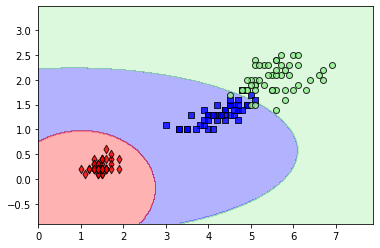

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_iris
Xcomplet, y = load_iris(return_X_y=True) 
print("Nom des classes: ", np.unique(y))
print("Nombre d'observations dans chacune des classes:", np.bincount(y))
print("Il y a ", Xcomplet.size, " observations avec ", Xcomplet[0].size, " attributs")
X=Xcomplet[:,[2,3]]
# on travaille ici avec les colonnes 2 et 3, on pourra changer cela.

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('d', 's', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl, 
                    edgecolor='black')
# GaussianNB est l'implémentation de l'algorithme de classification naïve 
# bayésienne pour des attributs continus pour lesquels on fait l'hypothèse que 
# leur distribution suit une loi gaussienne. On trouve dans scikit-learn 
# d'autres implémentations qui font des hypothèses différentes sur la 
# distribution. Si les attributs sont des catégories, scikit learn possède une
# fonction spéciale (voir la [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html)
 
gnb = GaussianNB()
gnb.fit(X,y)

plot_decision_regions(X, y, gnb)
plt.show()



A priori, pour un algorithme comme les arbres de décision, on va avoir une transition brutale quand on passe d'une classe à une autre. Ici, on peut utiliser les probabilités donnés par le modèle pour mesurer notre méfiance. Par exemple, dans la région ou les points de deux classes semblent se mélanger, on pourrait s'attendre à ce que l'algorithme retourne un probabilité haute mais pas proche de 1.

Considérons les points sur un segment de l'espace, par exemple, tous les points sur le segment entre (0,0) et (7,2). A l'aide de la fonction predict_proba, tracez la variation de la probabilité d'appartenir à une des trois classes sur ce segment.

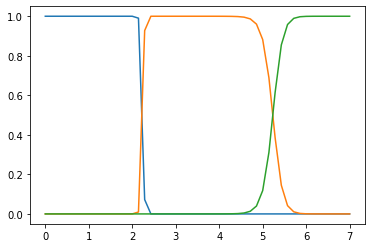

In [ ]:
import numpy as np

x = np.linspace(0,7)
y = (2/7)*x


m = np.vstack((x,y)).T
p = gnb.predict_proba(m)

plt.plot(x,p[:,0])
plt.plot(x,p[:,1])
plt.plot(x,p[:,2])